<a href="https://colab.research.google.com/github/Tiwari666/K_Means_Cluster/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering**

K-Means clustering is an  **unsupervised learning** algorithm used to group similar data points into clusters. The algorithm works as follows:

Initialization:

Choose the number of clusters k and randomly initialize the centroids of these clusters.

Assignment:

Assign each data point to the nearest centroid based on the **Euclidean distance **(or other distance metrics).

Update:

Recalculate the centroids as the mean of all data points assigned to that cluster.


Repeat:

Repeat the assignment and update steps until the centroids no longer change significantly (convergence) or a maximum number of iterations is reached.

The goal is to minimize the **sum of squared distances** between data points and their corresponding cluster centroids.

# **K-Nearest Neighbors (KNN)**

K-Nearest Neighbors is a **supervised learning** algorithm used for classification and regression tasks. The algorithm works as follows:

Initialization:

Choose the number of nearest neighbors, k. Common choices for
k are small odd numbers like 3, 5, or 7.

Data Preparation:

For a given test point, find and choose  the **smallest distances** to the test point wrt the
k nearest neighbors.


Prediction:


For a new data point, calculate the distance (usually Euclidean) to all training data points.

Identify the k nearest neighbors (data points with the smallest distances).
For classification, the new data point is assigned the label that is most common among its k nearest neighbors (majority vote).

For regression, the new data point's value is predicted as the average (or weighted average) of the values of its k nearest neighbors.

# **K-Means Clustering**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('iris.csv')
df

,0,1,2,3,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','species']
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Features for clustering
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# **Finding the Optimum Number of Clusters:**

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Finding the optimum number of clusters for k-means clustering
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i, random_state=42) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex


# **score method**
In the context of K-Means clustering, the score method calculates the opposite of the inertia (also known as within-cluster sum of squares). Inertia measures how tightly the clusters are packed around the centroids. Lower inertia means that the points within a cluster are closer to each other and to the centroid, indicating better-defined clusters.

The list is a sequence of inertia values (sum of squared distances of samples to their closest cluster center) for different numbers of clusters (from 1 to 9). These values are used to create the Elbow Curve, which helps in determining the optimal number of clusters for K-Means clustering.

In [ ]:
# Scores are negative (because score returns the opposite of inertia), we take the absolute value for plotting
score = [abs(s) for s in score]
score

[680.8243999999995,
 152.36870647733912,
 78.94084142614601,
 57.31787321428572,
 46.53558205128205,
 38.930963049671746,
 34.360208916009825,
 30.023416358198965,
 28.145502489617765]

# **Plot the Elbow Curve:**
Plot the absolute values of the scores against the number of clusters.

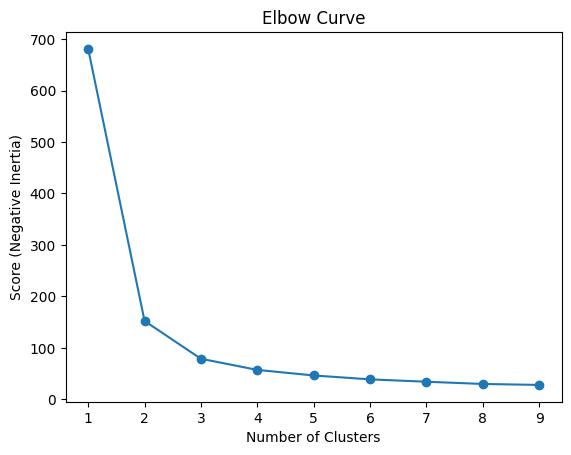

In [ ]:
# Plot the Elbow curve
plt.plot(Nc, score, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score (Negative Inertia)')
plt.title('Elbow Curve')
plt.show()

From the plot:

The inertia drops significantly from 1 to 2 clusters.

The rate of decrease slows down after 3 clusters.

Thus, the elbow appears to be around 3 clusters. This suggests that 3 is the optimal number of clusters for this dataset, as adding more clusters beyond this point provides diminishing returns in terms of reducing inertia.

# **Now, we have the optimum number of clusters (k=3). So, we can move on applying the K-means clustering to the Iris dataset.**

In [ ]:
model = KMeans(n_clusters = 3)

In [ ]:
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [ ]:
# Get the cluster labels for each data point
labels = model.labels_
labels
#The model.labels_ attribute in the KMeans class from scikit-learn provides the cluster labels for each point in the dataset.
#These labels indicate which cluster each point has been assigned to after fitting the model.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
# Add the cluster labels to the DataFrame
df['cluster'] = labels

In [ ]:
# Define the colormap
colormap = np.array(['Red', 'Blue', 'Green'])

# To enhance the visualization of the clusters, you can use a colormap to assign different colors to different clusters.
#In this case, we'll use the colormap defined as np.array(['Red', 'Blue', 'Green']) to color the points based on their cluster assignments.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

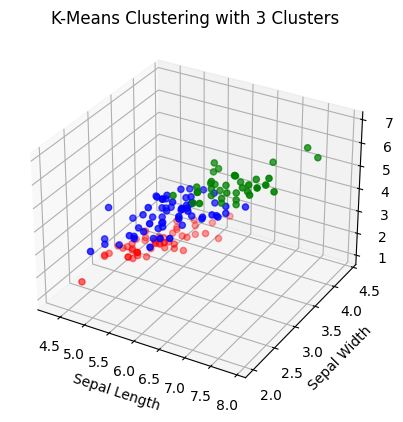

In [ ]:
# 3D Plotting the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['sepal_length'], df['sepal_width'], df['petal_length'], c=colormap[df['cluster']], marker='o')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('K-Means Clustering with 3 Clusters')
plt.show()

In [ ]:
# Display the DataFrame with cluster assignments
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
# Further Analysis
# Centroids of the clusters
centroids = model.cluster_centers_
print(f'Centroids of the clusters:\n{centroids}')

Centroids of the clusters:
[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


# **Interpretation**

Cluster 0:

Sepal Length: 5.006
Sepal Width: 3.418
Petal Length: 1.464
Petal Width: 0.244
This cluster has relatively small sepal length and petal dimensions. It likely represents a group of flowers that are smaller in size with smaller petals and sepals.


Cluster 1:

Sepal Length: 5.9016129
Sepal Width: 2.7483871
Petal Length: 4.39354839
Petal Width: 1.43387097

This cluster has moderate sepal length and width but larger petal length and width compared to Cluster 0. It likely represents a group of flowers with average-sized sepals but larger petals.


Cluster 2:

Sepal Length: 6.85
Sepal Width: 3.07368421
Petal Length: 5.74210526
Petal Width: 2.07105263

This cluster has the largest values for sepal and petal dimensions. It likely represents a group of flowers that are larger overall with larger petals and sepals.


Summary:
Cluster 0: Represents smaller flowers with small sepals and petals.

Cluster 1: Represents flowers with moderate sepals and larger petals.

Cluster 2: Represents the largest flowers with large sepals and petals.

In [ ]:
# Cluster sizes
cluster_sizes = df['cluster'].value_counts()
print(f'Cluster sizes:\n{cluster_sizes}')

Cluster sizes:
cluster
1    62
0    50
2    38
Name: count, dtype: int64


Cluster 0: Small-sized flowers with 50 data points.

Cluster 1: Moderate-sized flowers with the largest petals, containing 62 data points. This cluster has the most data points.

Cluster 2: Largest flowers with 38 data points. This cluster has the fewest data points.

# **Further Analysis**

Distribution of Features:

we can visualize the distribution of each feature within the clusters to understand the variation in sepal and petal dimensions within each cluster.

Comparison with True Labels (if available):

If we have true labels (e.g., species in the Iris dataset), we can compare the cluster assignments with the true labels to evaluate the clustering performance.

Silhouette Score:

Calculate the silhouette score to evaluate how well the clusters are defined.

The silhouette score measures how similar a data point is to its own cluster compared to other clusters.

Values close to 1 indicate well-defined clusters.

# **Distribution of Features:**

<ipython-input-31-f93213b64351>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette=colormap)
<ipython-input-31-f93213b64351>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(x='cluster', y=feature, data=df, palette=colormap)


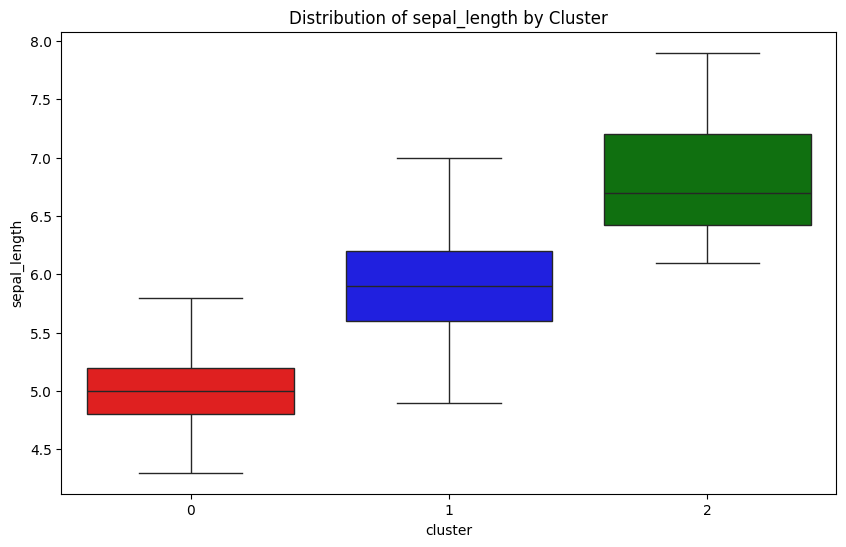

<ipython-input-31-f93213b64351>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette=colormap)
<ipython-input-31-f93213b64351>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(x='cluster', y=feature, data=df, palette=colormap)


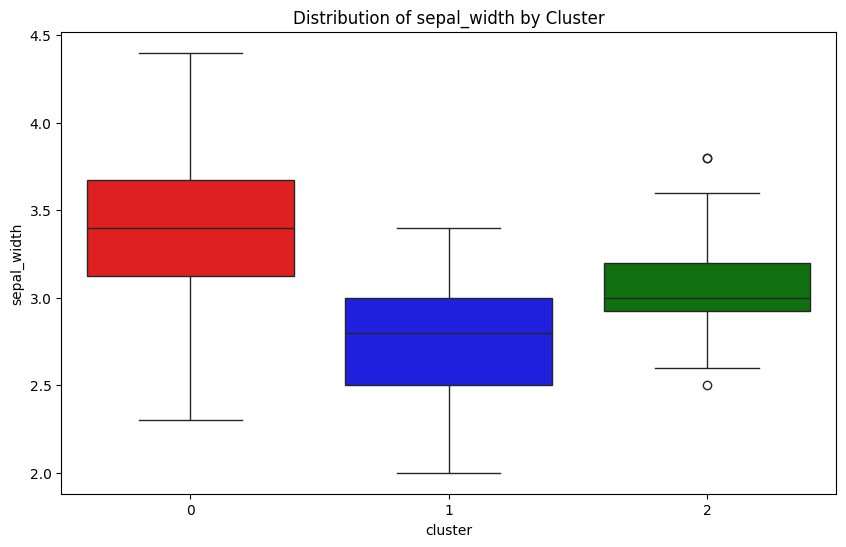

<ipython-input-31-f93213b64351>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette=colormap)
<ipython-input-31-f93213b64351>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(x='cluster', y=feature, data=df, palette=colormap)


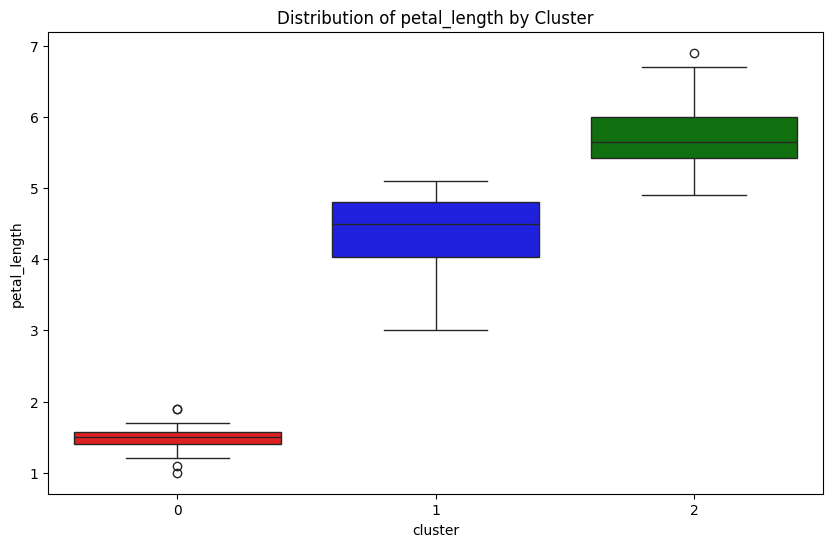

<ipython-input-31-f93213b64351>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette=colormap)
<ipython-input-31-f93213b64351>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(x='cluster', y=feature, data=df, palette=colormap)


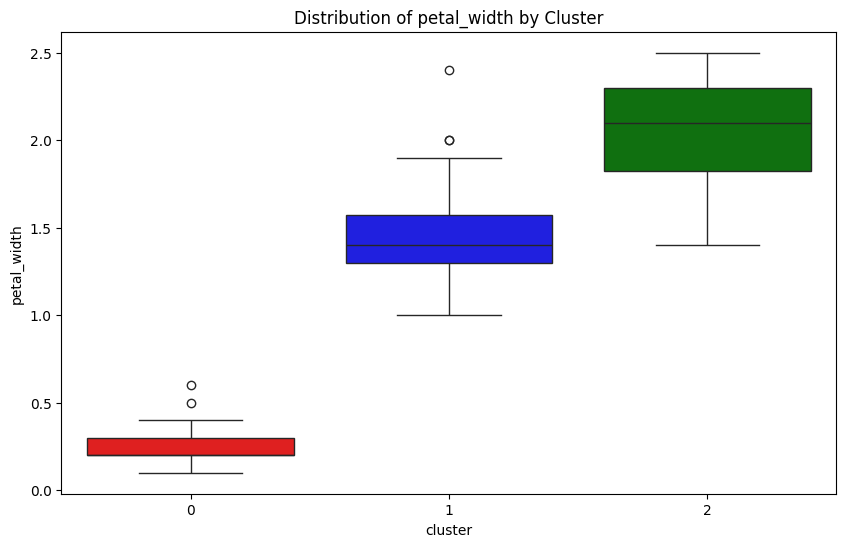

In [ ]:
import seaborn as sns

# Plotting the distribution of features within each cluster
for feature in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=feature, data=df, palette=colormap)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()


In [ ]:
df['species'] = ['setosa']*50 + ['versicolor']*50 + ['virginica']*50  # Example true labels for the Iris dataset

# Cross-tabulation of true labels vs cluster assignments
ct = pd.crosstab(df['species'], df['cluster'])
print(ct)

cluster      0   1   2
species               
setosa      50   0   0
versicolor   0  48   2
virginica    0  14  36


# **Interpretation**

Cluster 0:

setosa: 50
versicolor: 0
virginica: 0

Interpretation: Cluster 0 perfectly corresponds to the setosa species, indicating that all setosa flowers have been correctly grouped into this cluster. This suggests that setosa has distinct features that the K-Means algorithm could easily identify.

Cluster 1:

setosa: 0
versicolor: 48
virginica: 14


Interpretation: Cluster 1 primarily corresponds to the versicolor species with 48 versicolor flowers. However, it also includes 14 virginica flowers. This indicates some overlap in the features of versicolor and virginica, making it more challenging for the K-Means algorithm to distinguish between these two species entirely.

Cluster 2:

setosa: 0
versicolor: 2
virginica: 36

Interpretation: Cluster 2 mainly corresponds to the virginica species with 36 virginica flowers. There are also 2 versicolor flowers in this cluster, indicating some misclassification or overlap in the features of versicolor and virginica.

Summary:

Cluster 0: Perfectly captures all setosa flowers.

Cluster 1: Mainly captures versicolor flowers but includes some virginica flowers.

Cluster 2: Primarily captures virginica flowers but includes a few versicolor flowers.

# **Further Analysis**

Visualizing Feature Distributions:



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid

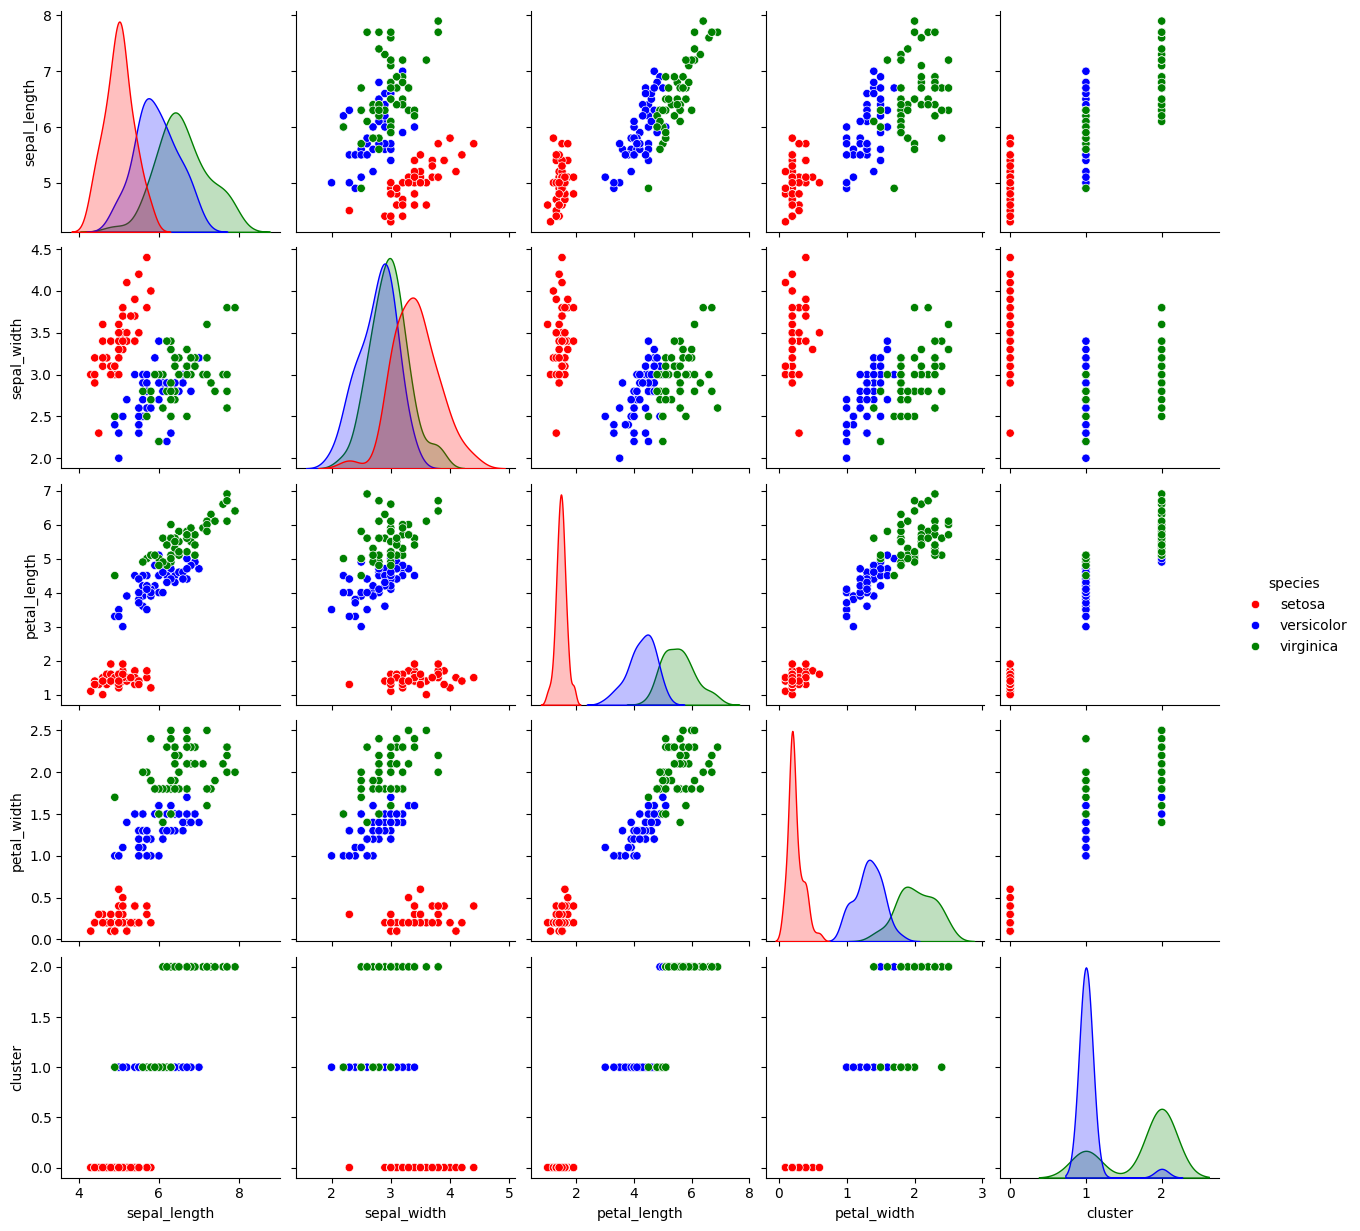

In [ ]:
import seaborn as sns

# Pair plot to visualize the feature distributions and overlap
sns.pairplot(df, hue='species', palette=colormap)
plt.show()

# **Improving Clustering:**

Using additional clustering techniques like Gaussian Mixture Models (GMM) or hierarchical clustering might improve the separation.

Feature scaling and dimensionality reduction techniques like PCA (Principal Component Analysis) can also help in better visualizing and distinguishing the clusters.

# **Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(X, model.labels_)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.55


# **All in one based on the previous output:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


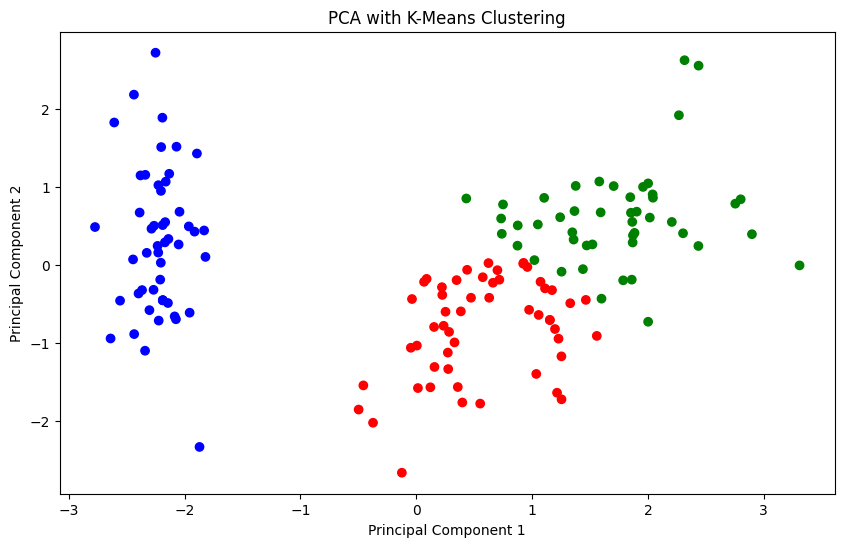

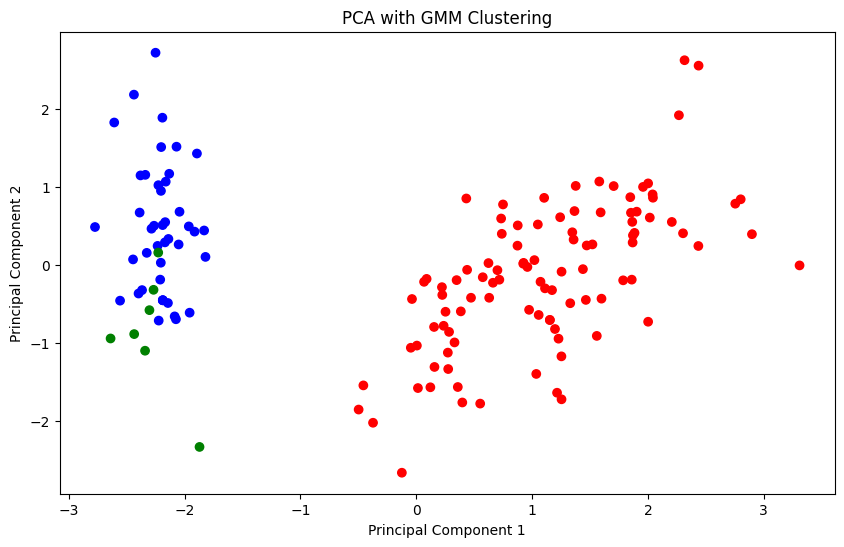

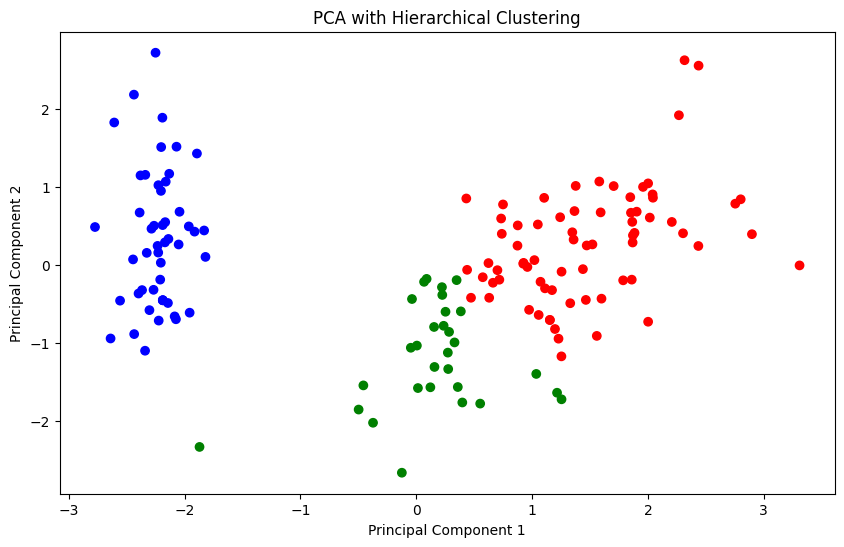

Comparison with True Labels:

K-Means Clustering:
kmeans_cluster    0   1   2
species                    
Iris-setosa       0  50   0
Iris-versicolor  39   0  11
Iris-virginica   14   0  36

GMM Clustering:
gmm_cluster       0   1  2
species                   
Iris-setosa       0  43  7
Iris-versicolor  50   0  0
Iris-virginica   50   0  0

Hierarchical Clustering:
hier_cluster      0   1   2
species                    
Iris-setosa       0  49   1
Iris-versicolor  23   0  27
Iris-virginica   48   0   2
Silhouette Score for K-Means: 0.46
Silhouette Score for GMM: 0.41
Silhouette Score for Hierarchical Clustering: 0.45
Adjusted Rand Index for K-Means: 0.62
Adjusted Rand Index for GMM: 0.51
Adjusted Rand Index for Hierarchical Clustering: 0.62
Normalized Mutual Information for K-Means: 0.66
Normalized Mutual Information for GMM: 0.68
Normalized Mutual Information for Hierarchical Clustering: 0.68
Accuracy for K-Means: 0.83
Accuracy for GMM: 0.62
Accuracy for Hierarchical Clustering: 0.83


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linear_sum_assignment
import seaborn as sns

# Load the Iris dataset from a CSV file
df = pd.read_csv('iris.csv')

# Rename the columns to match the expected names
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Create the feature matrix and the target vector
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[feature_columns].values
y = pd.Categorical(df['species']).codes  # Convert species to numerical codes
species = df['species'].unique()

# Step 1: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: GMM Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
df['gmm_cluster'] = gmm.fit_predict(X_scaled)

# Step 5: Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=3)
df['hier_cluster'] = agglo.fit_predict(X_scaled)

# Define the colormap
colormap = np.array(['Red', 'Blue', 'Green'])

# Plotting the results of PCA with K-Means Clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colormap[df['kmeans_cluster']], marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with K-Means Clustering')
plt.show()

# Plotting the results of PCA with GMM Clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colormap[df['gmm_cluster']], marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with GMM Clustering')
plt.show()

# Plotting the results of PCA with Hierarchical Clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colormap[df['hier_cluster']], marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Hierarchical Clustering')
plt.show()

# Comparison with True Labels
ct_kmeans = pd.crosstab(df['species'], df['kmeans_cluster'], rownames=['species'], colnames=['kmeans_cluster'])
ct_gmm = pd.crosstab(df['species'], df['gmm_cluster'], rownames=['species'], colnames=['gmm_cluster'])
ct_hier = pd.crosstab(df['species'], df['hier_cluster'], rownames=['species'], colnames=['hier_cluster'])

print("Comparison with True Labels:")
print("\nK-Means Clustering:")
print(ct_kmeans)
print("\nGMM Clustering:")
print(ct_gmm)
print("\nHierarchical Clustering:")
print(ct_hier)

# Calculate the silhouette score for each clustering method
silhouette_kmeans = silhouette_score(X_scaled, df['kmeans_cluster'])
silhouette_gmm = silhouette_score(X_scaled, df['gmm_cluster'])
silhouette_hier = silhouette_score(X_scaled, df['hier_cluster'])

print(f'Silhouette Score for K-Means: {silhouette_kmeans:.2f}')
print(f'Silhouette Score for GMM: {silhouette_gmm:.2f}')
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hier:.2f}')

# Calculate the Adjusted Rand Index and Normalized Mutual Information for each clustering method
ari_kmeans = adjusted_rand_score(y, df['kmeans_cluster'])
ari_gmm = adjusted_rand_score(y, df['gmm_cluster'])
ari_hier = adjusted_rand_score(y, df['hier_cluster'])

nmi_kmeans = normalized_mutual_info_score(y, df['kmeans_cluster'])
nmi_gmm = normalized_mutual_info_score(y, df['gmm_cluster'])
nmi_hier = normalized_mutual_info_score(y, df['hier_cluster'])

print(f'Adjusted Rand Index for K-Means: {ari_kmeans:.2f}')
print(f'Adjusted Rand Index for GMM: {ari_gmm:.2f}')
print(f'Adjusted Rand Index for Hierarchical Clustering: {ari_hier:.2f}')

print(f'Normalized Mutual Information for K-Means: {nmi_kmeans:.2f}')
print(f'Normalized Mutual Information for GMM: {nmi_gmm:.2f}')
print(f'Normalized Mutual Information for Hierarchical Clustering: {nmi_hier:.2f}')

# Calculate accuracy using the Hungarian algorithm to find the best permutation of cluster labels
def calculate_cluster_accuracy(true_labels, cluster_labels):
    cost_matrix = np.zeros((len(set(true_labels)), len(set(cluster_labels))), dtype=int)
    for i, true_label in enumerate(set(true_labels)):
        for j, cluster_label in enumerate(set(cluster_labels)):
            cost_matrix[i, j] = np.sum((true_labels == true_label) & (cluster_labels == cluster_label))

    row_ind, col_ind = linear_sum_assignment(cost_matrix.max() - cost_matrix)
    return np.sum([cost_matrix[i, j] for i, j in zip(row_ind, col_ind)]) / len(true_labels)

accuracy_kmeans = calculate_cluster_accuracy(y, df['kmeans_cluster'])
accuracy_gmm = calculate_cluster_accuracy(y, df['gmm_cluster'])
accuracy_hier = calculate_cluster_accuracy(y, df['hier_cluster'])

print(f'Accuracy for K-Means: {accuracy_kmeans:.2f}')
print(f'Accuracy for GMM: {accuracy_gmm:.2f}')
print(f'Accuracy for Hierarchical Clustering: {accuracy_hier:.2f}')


# **Interpretation**

Iris-setosa:

Perfectly clustered with all 50 samples in cluster 1.

Iris-versicolor:

Majority (39) incorrectly clustered in cluster 0, with only 11 correctly clustered in cluster 2.

Iris-virginica:

36 correctly clustered in cluster 2, but 14 incorrectly in cluster 0.

# **Recommendations**

Feature Engineering and Selection: Consider additional feature engineering or selection methods to improve clustering performance.

Combination of Methods: Try combining clustering methods (e.g., initializing GMM with K-Means centroids) to improve performance.

Advanced Techniques: Explore advanced clustering techniques such as DBSCAN, which might better handle the overlapping clusters.